In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "/content/drive/My Drive/Landscape.zip"

In [0]:
!ls

drive  Landscape  sample_data


In [0]:
import os
os.getcwd()

'/content'

In [0]:
import cv2
import matplotlib.pyplot as plt
from fastai.vision import * 
from fastai.metrics import error_rate

In [0]:
path_img = '/content/Landscape'

In [0]:
bs = 64
f_names = get_image_files(path_img)
f_names[:5]

[PosixPath('/content/Landscape/not_disaster_45.jpg'),
 PosixPath('/content/Landscape/not_disaster_120.jpg'),
 PosixPath('/content/Landscape/disaster_72.jpg'),
 PosixPath('/content/Landscape/not_disaster_106.jpg'),
 PosixPath('/content/Landscape/not_disaster_108.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, f_names, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

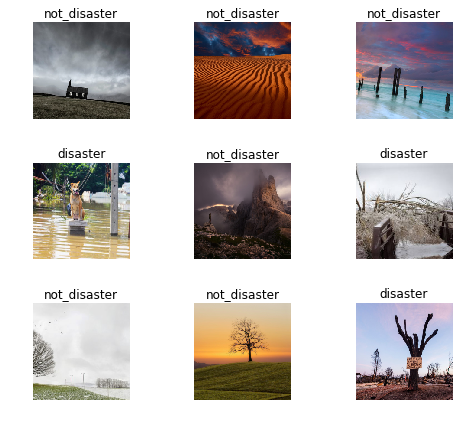

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data.classes

['disaster', 'not_disaster']

#Training on resnet34

In [0]:
landscp_learner = cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 74063351.70it/s]


In [0]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data:fastai.basic_data.DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, init=<function kaiming_normal_ at 0x7fe2dbf51620>, concat_pool:bool=True, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [0]:
landscp_learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
landscp_learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.903031,0.590898,0.650794,00:18
1,0.729364,0.770520,0.650794,00:16
2,0.617747,0.749002,0.730159,00:16
3,0.540965,0.626756,0.761905,00:17


In [0]:
landscp_learner.save('stage-1')

#Getting results 

In [0]:
intrprt = ClassificationInterpretation.from_learner(landscp_learner)
loss,indexes = intrprt.top_losses()
len(data.valid_ds)==len(loss)==len(indexes)

True

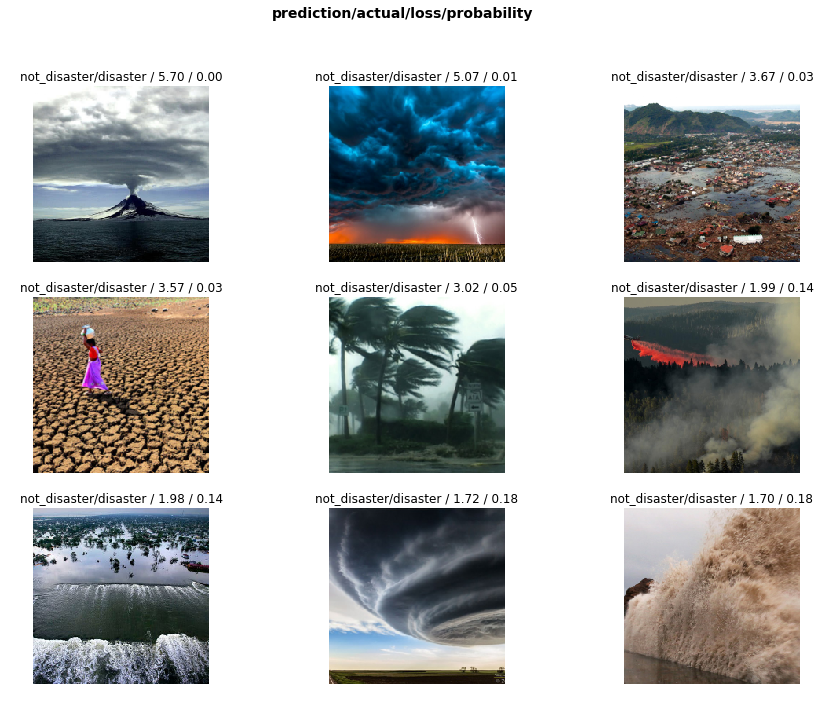

In [0]:
intrprt.plot_top_losses(9,figsize=(15,11))

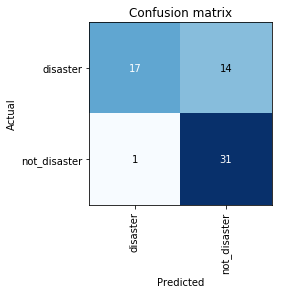

In [0]:
intrprt.plot_confusion_matrix()

In [0]:
landscp_learner.unfreeze()

In [0]:
landscp_learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.330654,0.425032,0.793651,00:16


In [0]:
landscp_learner.load('stage-1');

In [0]:
landscp_learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


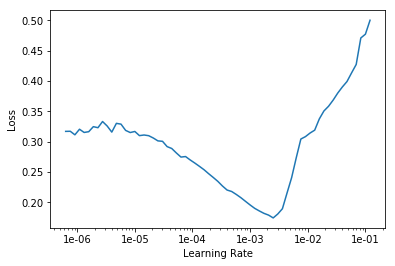

In [0]:
landscp_learner.recorder.plot()